In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pylab import rcParams

In [3]:
data = pd.read_csv("New_dog_breeds1.csv")

In [5]:
data 

,Breed,Country of Origin,Fur Color,Height,Color of Eyes,Longetivity,Temparament,Common Health Problems,weight,Food,Coat Length
0,Labrador Retriever,Canada,Chocolate,21-24,Brown,10/12/2024,Energetic,Hip dysplasia,227,Dry food,short
1,German Shepherd,Germany,Tan,22-26,Brown,07/10/2024,Protective,pancreatitis,20,Canned food,medium
2,Bulldog,England,White,72-18,Brown,08/10/2024,Brave,Skin allergies,35,semi-moist food,medium
3,Poodle,France,Apricot,14-29,Blue,01/12/2015,Hypoallergenic,epilepsy,22,Home-cooked Receipes,short
4,Beagle,England,Lemon,13-15,Brown,01/12/2015,Curious,Ear infections,10,Raw Diet,long
...,...,...,...,...,...,...,...,...,...,...,...
112,Catahoula Leopard Dog,United States,Merle,20-26,Brown,01/12/2014,Intelligent,Dental problems,32,Purina,long
113,Cocker Spaniel,England,Brown,14-15,Brown,01/12/2015,Good-natured,Dental problems,4,Royal canine,short
114,Miniature Shiba Inu,Japan,Sesame,13-16,Brown,01/12/2015,Playful,eye issues,82,semi-moist food,long
115,Belgian Tervuren,Belgium,Fawn,22-26,Brown,01/12/2014,Energetic,skin allergies,74,Dry food,long


In [6]:
data.head(10)

,Breed,Country of Origin,Fur Color,Height,Color of Eyes,Longetivity,Temparament,Common Health Problems,weight,Food,Coat Length
0,Labrador Retriever,Canada,Chocolate,21-24,Brown,10/12/2024,Energetic,Hip dysplasia,227,Dry food,short
1,German Shepherd,Germany,Tan,22-26,Brown,07/10/2024,Protective,pancreatitis,20,Canned food,medium
2,Bulldog,England,White,72-18,Brown,08/10/2024,Brave,Skin allergies,35,semi-moist food,medium
3,Poodle,France,Apricot,14-29,Blue,01/12/2015,Hypoallergenic,epilepsy,22,Home-cooked Receipes,short
4,Beagle,England,Lemon,13-15,Brown,01/12/2015,Curious,Ear infections,10,Raw Diet,long
5,Chihuahua,Mexico,Tan,22-27,Blue,01/12/2020,Sensitive,Dental problems,25,Purina,long
6,Boxer,Germany,Brindle,21-25,Brown,10/12/2024,Playful,cancer,9,Dry food,short
7,Golden Retriever,Scotland,Golden,21-24,Brown,10/12/2024,Intelligent,cancer,22,Canned food,long
8,Pug,China,Fawn,21-16,Brown,01/12/2015,Social,Eye problems,27,Purina,medium
9,Rottweiler,Germany,Black,22-27,Brown,08/10/2024,Strong,Obesity,25,Home-cooked Receipes,medium


In [7]:
data.tail(5)

,Breed,Country of Origin,Fur Color,Height,Color of Eyes,Longetivity,Temparament,Common Health Problems,weight,Food,Coat Length
112,Catahoula Leopard Dog,United States,Merle,20-26,Brown,01/12/2014,Intelligent,Dental problems,32,Purina,long
113,Cocker Spaniel,England,Brown,14-15,Brown,01/12/2015,Good-natured,Dental problems,4,Royal canine,short
114,Miniature Shiba Inu,Japan,Sesame,13-16,Brown,01/12/2015,Playful,eye issues,82,semi-moist food,long
115,Belgian Tervuren,Belgium,Fawn,22-26,Brown,01/12/2014,Energetic,skin allergies,74,Dry food,long
116,Pharaoh Hound,Malta,Red,21-25,Brown,01/12/2014,Loyal,skin allergies,56,Raw Diet,medium


In [8]:
data.isna().sum()

Breed                     0
Country of Origin         0
Fur Color                 0
Height                    0
Color of Eyes             0
Longetivity               0
Temparament               0
Common Health Problems    0
weight                    0
Food                      0
Coat Length               0
dtype: int64

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
112    False
113    False
114    False
115    False
116    False
Length: 117, dtype: bool

In [10]:
data.columns

Index(['Breed', 'Country of Origin', 'Fur Color', 'Height', 'Color of Eyes',
       'Longetivity', 'Temparament', 'Common Health Problems', 'weight',
       'Food', 'Coat Length'],
      dtype='object')

In [11]:
specific_columns = ["Hip dysplasia", "Skin allergies"]

In [12]:
data[data["Common Health Problems"].isin(specific_columns)]

,Breed,Country of Origin,Fur Color,Height,Color of Eyes,Longetivity,Temparament,Common Health Problems,weight,Food,Coat Length
0,Labrador Retriever,Canada,Chocolate,21-24,Brown,10/12/2024,Energetic,Hip dysplasia,227,Dry food,short
2,Bulldog,England,White,72-18,Brown,08/10/2024,Brave,Skin allergies,35,semi-moist food,medium
20,Mastiff,England,Apricot,30-34,Brown,08/10/2024,Protective,Hip dysplasia,40,Purina,short
26,Scottish Deerhound,Scotland,Grey,28-32,Brown,08/10/2024,Intelligent,Hip dysplasia,72,semi-moist food,short
28,Shar Pei,China,Cream,18-20,Brown,08/12/2024,Independent,Skin allergies,50,Canned food,long
29,Doberman Pinscher,Germany,Black,24-28,Brown,10/12/2024,Energetic,Hip dysplasia,20,Royal canine,short
40,Miniature Poodle,France,Apricot,34-12,Blue,01/12/2015,Active,Hip dysplasia,80,Dry food,long


In [13]:
data[(data["weight"]>=100)]

,Breed,Country of Origin,Fur Color,Height,Color of Eyes,Longetivity,Temparament,Common Health Problems,weight,Food,Coat Length
0,Labrador Retriever,Canada,Chocolate,21-24,Brown,10/12/2024,Energetic,Hip dysplasia,227,Dry food,short


In [15]:
data["weight"].mode()

0    34
Name: weight, dtype: int64

In [16]:
data["weight"].median()

np.float64(34.0)

In [17]:
data.describe()

,weight
count,117.000000
mean,39.717949
std,28.999657
min,3.000000
25%,21.000000
50%,34.000000
75%,56.000000
max,227.000000


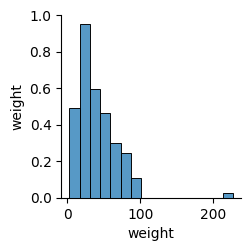

In [22]:
sns.pairplot(data)

<Axes: xlabel='Coat Length', ylabel='Temparament'>

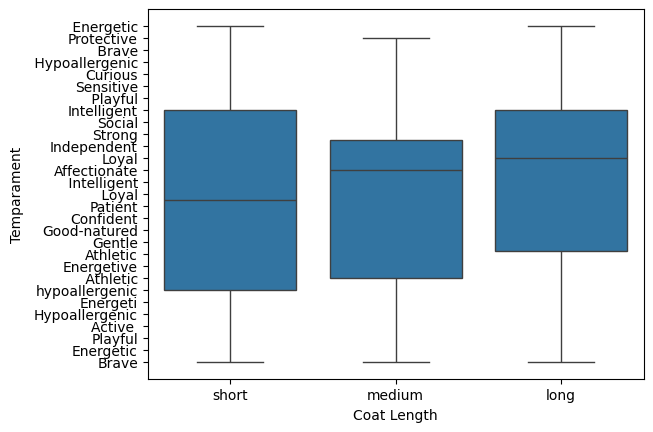

In [18]:
sns.boxplot(data =data, x = "Coat Length", y = "Temparament")

In [27]:
data.columns

Index(['Breed', 'Country of Origin', 'Fur Color', 'Height', 'Color of Eyes',
       'Longetivity', 'Temparament', 'Common Health Problems', 'weight',
       'Food', 'Coat Length'],
      dtype='object')

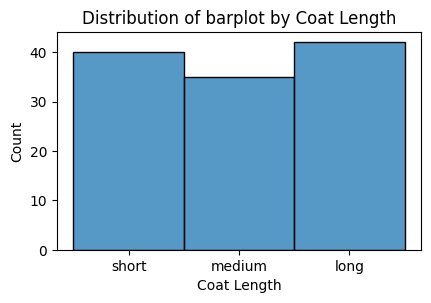

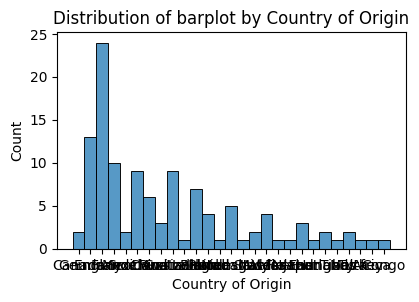

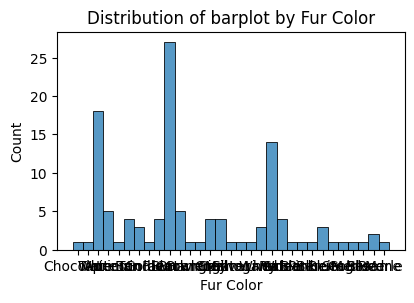

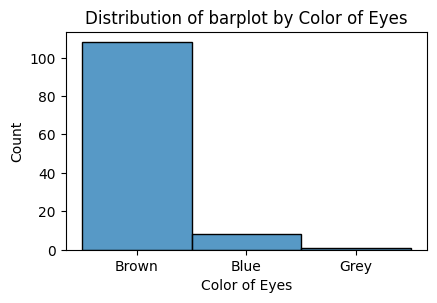

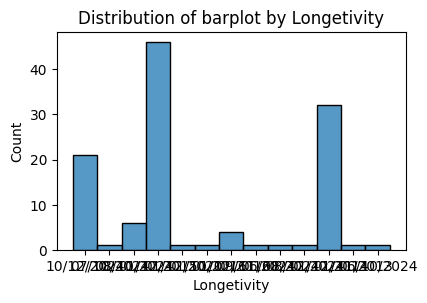

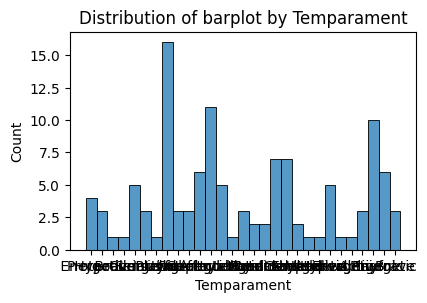

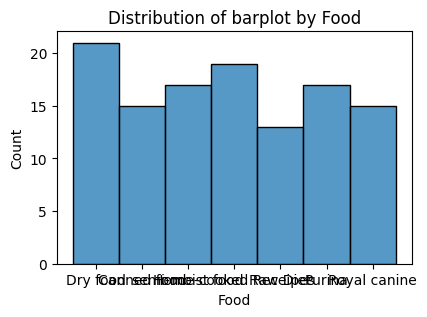

In [26]:
categorical_columns = data[["Coat Length", "Country of Origin", "Fur Color", "Color of Eyes", "Longetivity", "Temparament", "Food"]]
for i, x in enumerate(categorical_columns):
    plt.figure(figsize = (12,8))
    plt.subplot(3,3,i+1)
    sns.histplot(data=data, x=x)
    plt.tight_layout()
    plt.title(f"Distribution of barplot by {x}")
    plt.show()

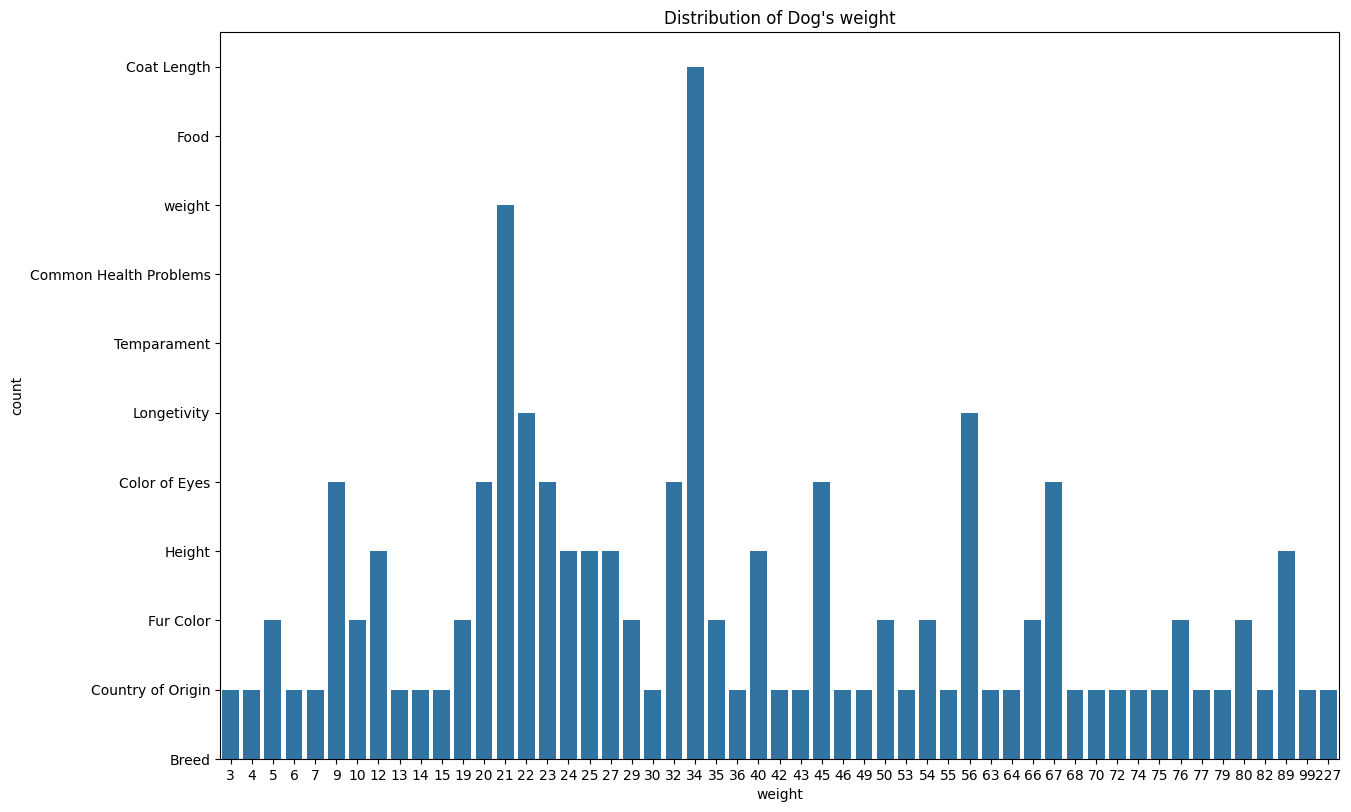

In [32]:
plt.figure(figsize = (12,8))
sns.countplot(data = data, x = "weight")
plt.tight_layout()
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.title("Distribution of Dog's weight")
plt.show()

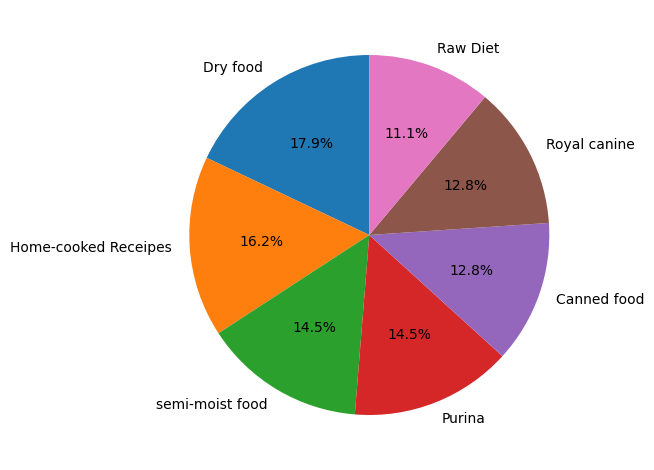

In [33]:
Food_count = data["Food"].value_counts()
plt.pie(Food_count, labels = Food_count.index, autopct = "%1.1f%%", startangle = 90)
plt.tight_layout()
plt.show()

In [35]:
data.columns

Index(['Breed', 'Country of Origin', 'Fur Color', 'Height', 'Color of Eyes',
       'Longetivity', 'Temparament', 'Common Health Problems', 'weight',
       'Food', 'Coat Length'],
      dtype='object')

In [36]:
data["Coat Length"].unique()

array(['short', 'medium', 'long'], dtype=object)

In [37]:
data["Coat Length"].value_counts()

Coat Length
long      42
short     40
medium    35
Name: count, dtype: int64

In [38]:
data["Coat Length"] = data["Coat Length"].replace(["long", "short", "medium"], [0,1,2])

C:\Users\USER\AppData\Local\Temp\ipykernel_6064\1686826380.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Coat Length"] = data["Coat Length"].replace(["long", "short", "medium"], [0,1,2])


In [42]:
data.head(5)

,Breed,Country of Origin,Fur Color,Height,Color of Eyes,Longetivity,Temparament,Common Health Problems,weight,Food,Coat Length
0,Labrador Retriever,Canada,Chocolate,21-24,Brown,10/12/2024,Energetic,Hip dysplasia,227,Dry food,1
1,German Shepherd,Germany,Tan,22-26,Brown,07/10/2024,Protective,pancreatitis,20,Canned food,2
2,Bulldog,England,White,72-18,Brown,08/10/2024,Brave,Skin allergies,35,semi-moist food,2
3,Poodle,France,Apricot,14-29,Blue,01/12/2015,Hypoallergenic,epilepsy,22,Home-cooked Receipes,1
4,Beagle,England,Lemon,13-15,Brown,01/12/2015,Curious,Ear infections,10,Raw Diet,0


In [43]:
data["Food"].value_counts()

Food
Dry food                21
Home-cooked Receipes    19
semi-moist food         17
Purina                  17
Canned food             15
Royal canine            15
Raw Diet                13
Name: count, dtype: int64

In [44]:
data["Food"] = data["Food"].replace(["Dry food", "Home-cooked Receipes", "semi-moist food", "Purina","Canned food","Royal canine","Raw Diet"], [0,1,2,3,4,5,6])

C:\Users\USER\AppData\Local\Temp\ipykernel_6064\1461418026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Food"] = data["Food"].replace(["Dry food", "Home-cooked Receipes", "semi-moist food", "Purina","Canned food","Royal canine","Raw Diet"], [0,1,2,3,4,5,6])


In [52]:
data.head(5)

,Breed,Country of Origin,Fur Color,Height,Color of Eyes,Longetivity,Temparament,Common Health Problems,weight,Food,Coat Length
0,Labrador Retriever,Canada,Chocolate,21-24,Brown,10/12/2024,Energetic,Hip dysplasia,227,0,1
1,German Shepherd,Germany,Tan,22-26,Brown,07/10/2024,Protective,pancreatitis,20,4,2
2,Bulldog,England,White,72-18,Brown,08/10/2024,Brave,Skin allergies,35,2,2
3,Poodle,France,Apricot,14-29,Blue,01/12/2015,Hypoallergenic,epilepsy,22,1,1
4,Beagle,England,Lemon,13-15,Brown,01/12/2015,Curious,Ear infections,10,6,0


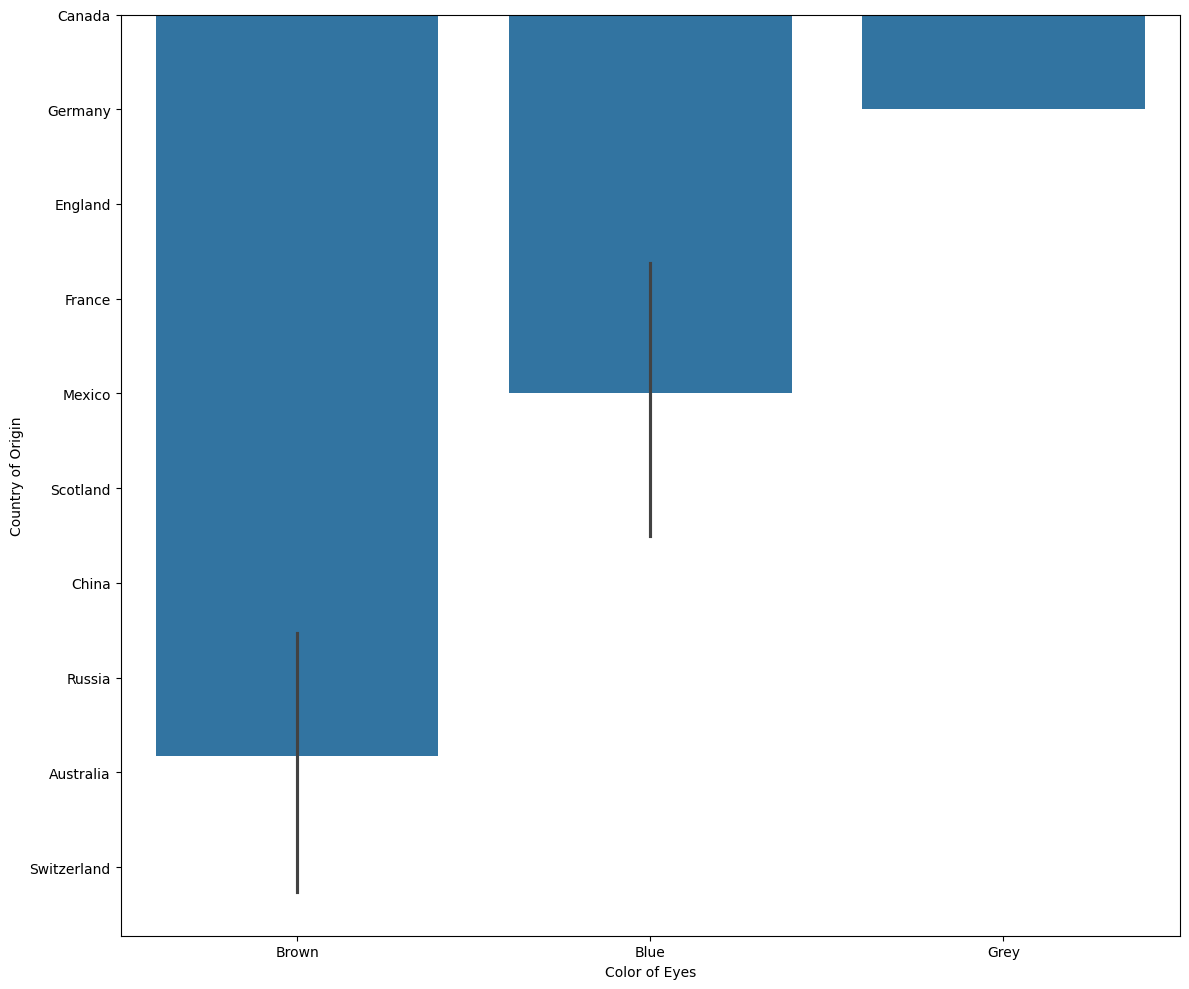

In [59]:
plt.figure(figsize = (12,10))
sns.barplot(data=data, x = "Color of Eyes", y = "Country of Origin")
plt.tight_layout()

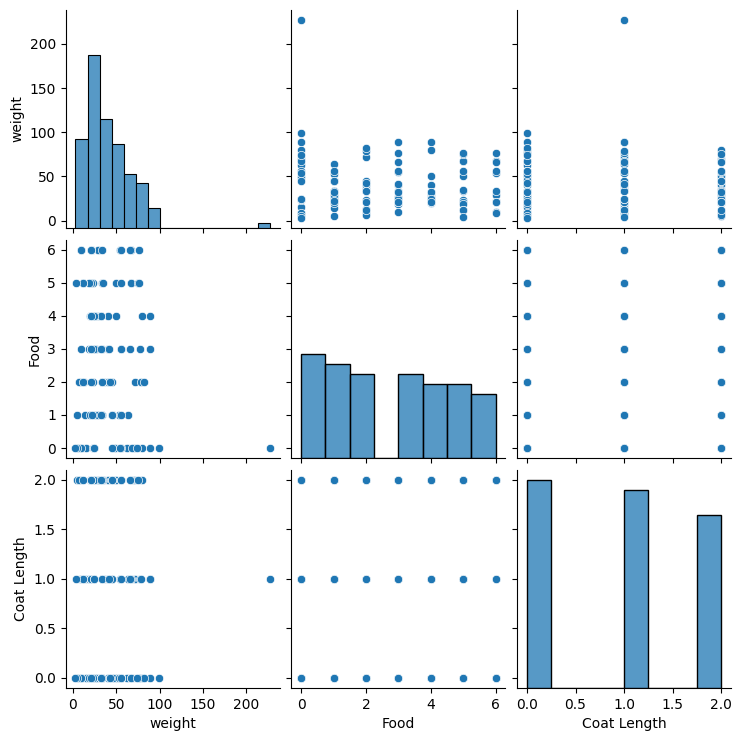

In [61]:
sns.pairplot(data)

In [62]:
data["Common Health Problems"].value_counts()

Common Health Problems
Dental problems                20
skin allergies                 17
 skin allergies                 9
Hip dysplasia                   5
eye issues                      5
hip dysplasia                   4
epilepsy                        4
Intervertebral disc disease     4
eye problems                    4
Obesity                         4
 cancer                         3
Cancer                          3
 eye issues                     3
Skin allergies                  2
 pancreatitis                   2
 heart conditions               2
diabetes                        2
Eye problems                    2
Ear infections                  2
pancreatitis                    2
elbow dysplasia,                2
respiratory issues              2
 eye problems                   2
 respiratory issues             1
cancer                          1
 ear infections                 1
bladder stones                  1
 obesity                        1
Breathing problems       